# Introduction

This notebook aims at getting a good insight in the data for the PorteSeguro Competition. Besides that, it gives some tips and tricks to prepare your data modeling. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100) # 최대 출력 열 개수 

import warnings
warnings.filterwarnings("ignore")

## Loading data

In [2]:
%%time
train = pd.read_csv("/Users/kimjw/Desktop/Kaggle/week2/train.csv")
test = pd.read_csv("/Users/kimjw/Desktop/Kaggle/week2/test.csv")

CPU times: user 9.23 s, sys: 1.47 s, total: 10.7 s
Wall time: 12.5 s


## Data at first sight

Here is an exception of the data description for the competition:
* Features that belong to **similar groupings are tagged** as such in the feature names.
* Feature names include the postfix **bin** to indicate binary features and **cat** to indicate categorical features. => 분석 #시, binary 변수는 dummy변수화 해줄 필요가 없다. 범주형 변수만 더미화 해준다.
* Features **without these designations(tags) are either continuous or ordinal**.
* Values of **-1** indicate that the feature was **missing** from the observation.
* The **target** columns signifies whether or not a claim was filed for the policy holder.(claim 있었으면 1, 없었으면 0)

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [5]:
train.shape # train data의 행과 열의 개수 출력

(595212, 59)

In [6]:
train.drop_duplicates() # 중복된 값이 있으면 제거
train.shape # 위의 결과와 같은 것으로 보아 중복 값 없음

(595212, 59)

In [7]:
test.shape # target변수가 없으므로 train보다 하나 작은 값이 나와야 정상

(892816, 58)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

* 데이터 타입은 integer 또는 float(Null value는 -1로 세팅되어 있음)

## Metadata
* **role** : input, ID, target
* **level** : nominal, interval, ordinal, binary
* **keep** :  True, False
* **dtype** : int, float, str

In [9]:
data = []
for f in train.columns:
    # Defining the role
    if f == "target":
        role = "target"
    elif f == "id":
        role = "id"
    else:
        role = "input"
        
    # Defining the level
    if "bin" in f or f == "target":
        level = "binary"
    elif "cat" in f or f == "id":
        level = "nominal"
    elif train[f].dtype == float:
        level = "interval"
    elif train[f].dtype == int:
        level = "ordinal"
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == "id":
        keep = False
        
    # Defining the data type
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the meta-data for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype' : dtype
    }
    data.append(f_dict)

In [10]:
meta = pd.DataFrame(data, columns=['varname','role','level','keep','dtype'])
meta.set_index('varname', inplace = True)

In [11]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [12]:
# Example to extract all nominal variables that are not dropped
meta[(meta.level == "nominal") & (meta.keep)]

,role,level,keep,dtype
varname,,,,
ps_ind_02_cat,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_car_01_cat,input,nominal,True,int64
ps_car_02_cat,input,nominal,True,int64
ps_car_03_cat,input,nominal,True,int64
ps_car_04_cat,input,nominal,True,int64
ps_car_05_cat,input,nominal,True,int64
ps_car_06_cat,input,nominal,True,int64


In [13]:
# number of variables per rold and level are displayed
pd.DataFrame({"count": meta.groupby(["role","level"])["role"].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive statistics

### **Interval variables**

In [14]:
v = meta[(meta.level == "interval") & (meta.keep)].index
print(v)
train[v].describe()

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='varname')


,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


**reg variables**
- only ps_reg_03 has missing value, -1
- the range(min to max) differs b.w. the variables. We could apply scaling, but it depends on the classifier we will want to use.(모델 분류기에 따라 스케일링을 안할 수도 있다)

**car variables**
- ps_car_12 and ps_car_25 have missing value
- again, the range differs and we could apply scaling.

**calc variables**
- no missing value
- this seems to be some kind of ratio as the maximum is 0.9
- all three _cal variables have very similiar distributions

Overall, we can see that the range of the interval variables is rather small. Perhaps some transformation(ex. log) is already applied in order to anonymize the data?(어느정도 비식별화 되어 있는 것 같다)

### Ordinal variables

In [15]:
v = meta[(meta.level == "ordinal") & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


* Only one missing variable in ps_car_11
* We could apply scaling to deal with the different ranges

### Binary variables

In [16]:
v = meta[(meta.level == "binary") & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* A priori in the train data is 3.645%, which is **strongly imbalanced.**
* From the means, we can conclude that for most variables the value is zero in most cases.(대부분 보험청구가 일어나지 않았다, target=0)

## Handling imbalanced classes
As we mentioned above the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. Two possible strategies to deal with this problem are :
* Oversampling records with target=1
* Undersampling records with target=0
As we have a rather large training set, we can go for **undersampling**

In [17]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1) / (nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print("Rate to undersample records with target=0: {}".format(undersampling_rate))
print("Number of records with target=0 after undersampling: {}".format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired apriori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True) # shuffle했기 때문에 index 초기화 필요

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


## Data Quality Checks
### Checking missing values
(Missing are represented as -1)

In [18]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print("Variables {} has {} records ({:.2%}) with missing values".format(f, missings, missings_perc))

print("In total, there are {} variables with missing values".format(len(vars_with_missing)))

Variables ps_ind_02_cat has 103 records (0.05%) with missing values
Variables ps_ind_04_cat has 51 records (0.02%) with missing values
Variables ps_ind_05_cat has 2256 records (1.04%) with missing values
Variables ps_reg_03 has 38580 records (17.78%) with missing values
Variables ps_car_01_cat has 62 records (0.03%) with missing values
Variables ps_car_02_cat has 2 records (0.00%) with missing values
Variables ps_car_03_cat has 148367 records (68.39%) with missing values
Variables ps_car_05_cat has 96026 records (44.26%) with missing values
Variables ps_car_07_cat has 4431 records (2.04%) with missing values
Variables ps_car_09_cat has 230 records (0.11%) with missing values
Variables ps_car_11 has 1 records (0.00%) with missing values
Variables ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


* **ps_car_03_cat** and **ps_car_05_cat** have a large proportion of records with missing values. => Drop these variables
* For the other categorical variables with missing values, we can leave the missing value -1 as such.
* **ps_reg_03** has missing values for 18% of all records. => Replace by the mean(continuous)
* **ps_car_11** has only 5 records with missing values => Replace by the mode(ordinal)
* **ps_car_12** has only 1 records with missing value. => Reaplace by the mean(continuous)
* **ps_car_14** has missing values for 7% of all records => Replace by the mean(continuous)

In [19]:
# Drop the variables with too many missing values
vars_to_drop = ["ps_car_03_cat", "ps_car_05_cat"]
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), "keep"] = False

In [20]:
# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy="mean")
mode_imp = SimpleImputer(missing_values=-1, strategy="most_frequent")

train["ps_reg_03"] = mean_imp.fit_transform(train[["ps_reg_03"]]).ravel()
train["ps_car_12"] = mean_imp.fit_transform(train[["ps_car_12"]]).ravel()
train["ps_car_14"] = mean_imp.fit_transform(train[["ps_car_14"]]).ravel()
train["ps_car_11"] = mode_imp.fit_transform(train[["ps_car_11"]]).ravel()

### Checking the cardinality of the categorical variables
<br>Cardinality refers to the number of different values in a variable. As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We whould handle these variables differently as they would result in many dummy variables.

In [21]:
v = meta[(meta.level == "nominal") & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print("Variable {} has {} distinct values.".format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values.
Variable ps_ind_04_cat has 3 distinct values.
Variable ps_ind_05_cat has 8 distinct values.
Variable ps_car_01_cat has 13 distinct values.
Variable ps_car_02_cat has 3 distinct values.
Variable ps_car_04_cat has 10 distinct values.
Variable ps_car_06_cat has 18 distinct values.
Variable ps_car_07_cat has 3 distinct values.
Variable ps_car_08_cat has 2 distinct values.
Variable ps_car_09_cat has 6 distinct values.
Variable ps_car_10_cat has 3 distinct values.
Variable ps_car_11_cat has 104 distinct values.


Only **ps_car_11** has many distinct values, although it is still reasonable.

In [22]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series = None,
                 tst_series = None,
                 target = None,
                 min_samples_leaf = 1,
                 smoothing = 1,
                 noise_level = 0):
    
    # assert는 True면 넘어가고, False면 에러 출력
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    
    # Apply average function to all target data
    prior = target.mean()
    
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    # 노이즈를 넣어주는 이유는 너무 discrete한 걸 방지하고 continuous하게 만들어주기 위해
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [23]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

# Explatory Data Visualization
## Categorical variables
Let's look into the categorical variables and the proportion of customers with target=1

<Figure size 432x288 with 0 Axes>

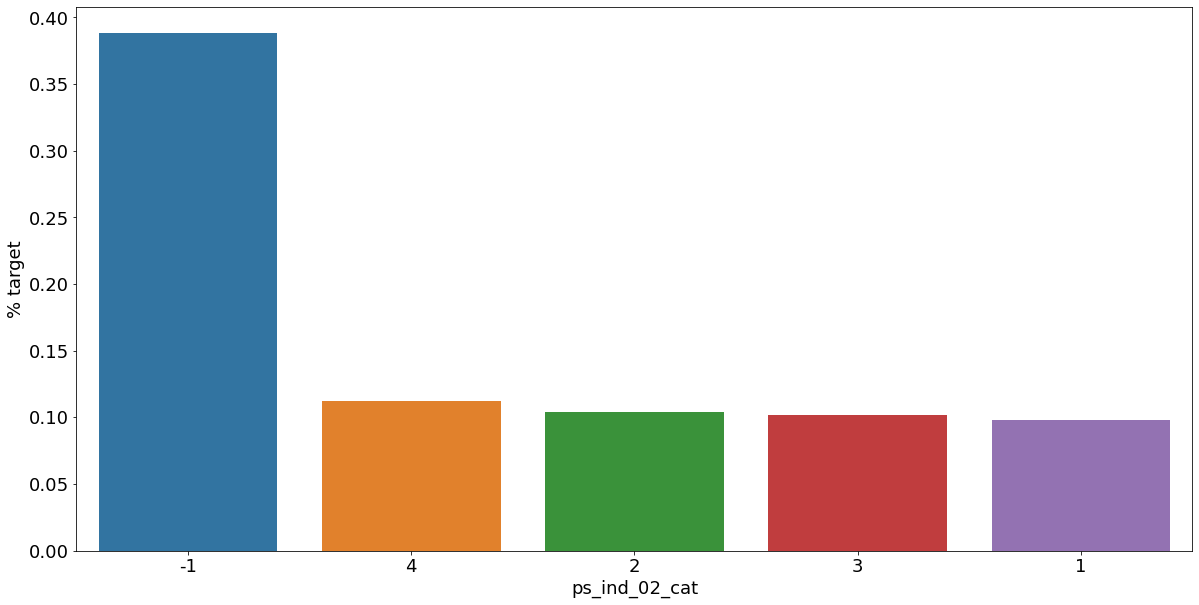

<Figure size 432x288 with 0 Axes>

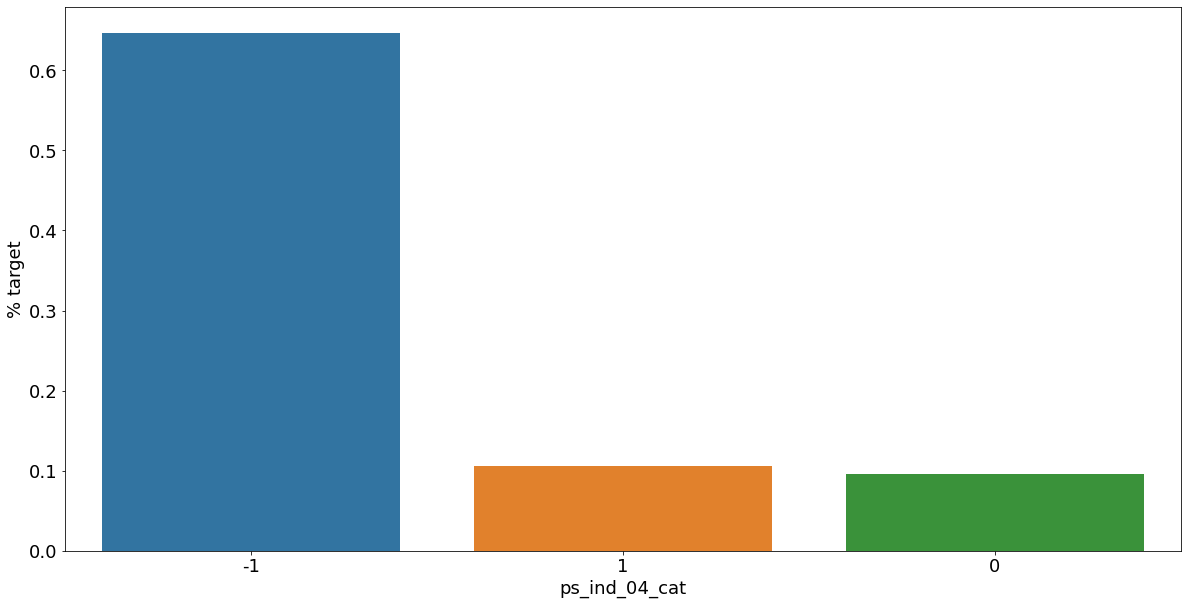

<Figure size 432x288 with 0 Axes>

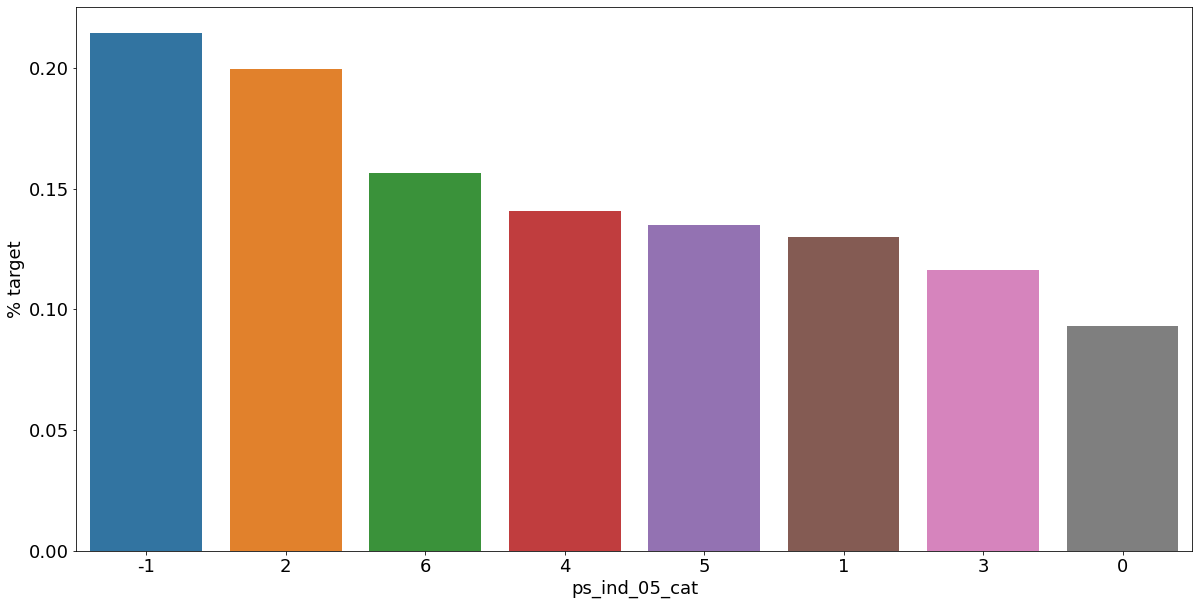

<Figure size 432x288 with 0 Axes>

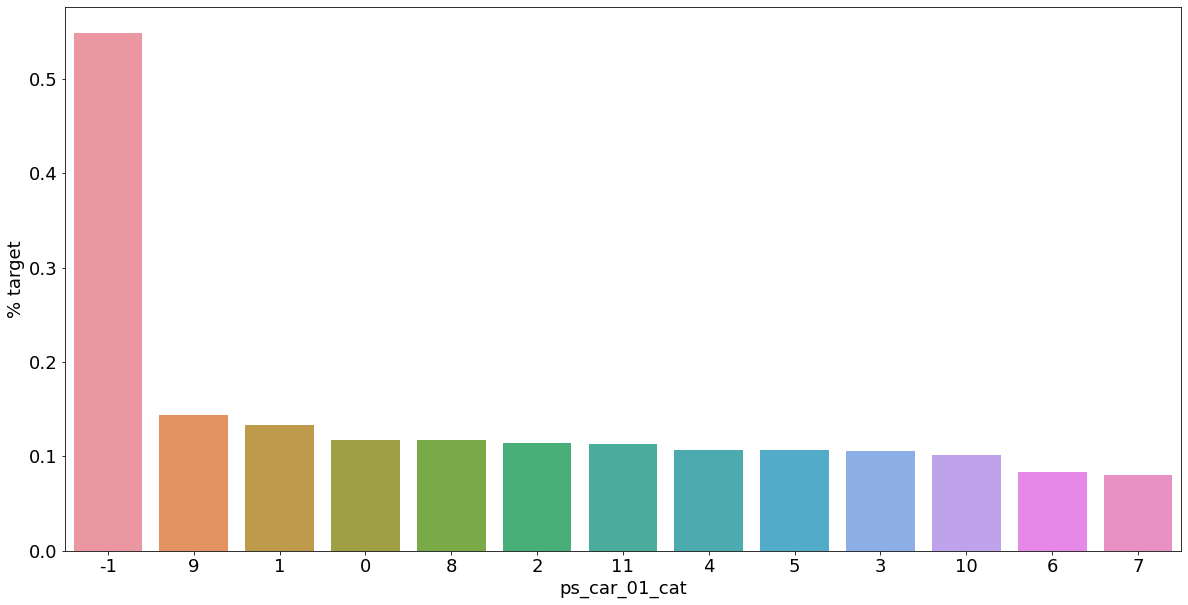

<Figure size 432x288 with 0 Axes>

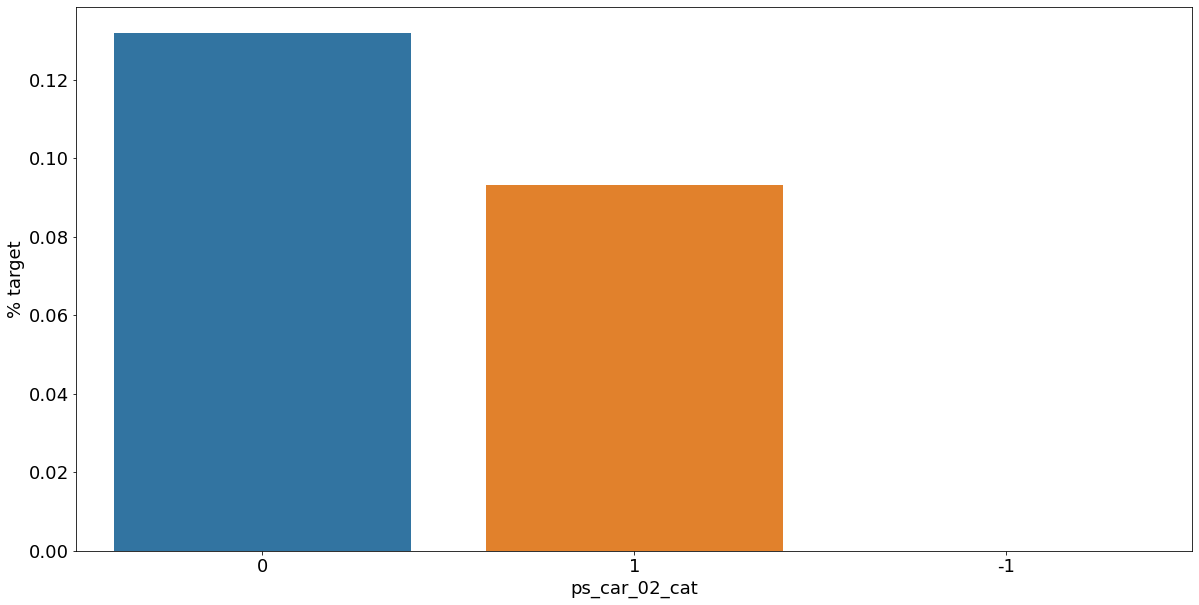

<Figure size 432x288 with 0 Axes>

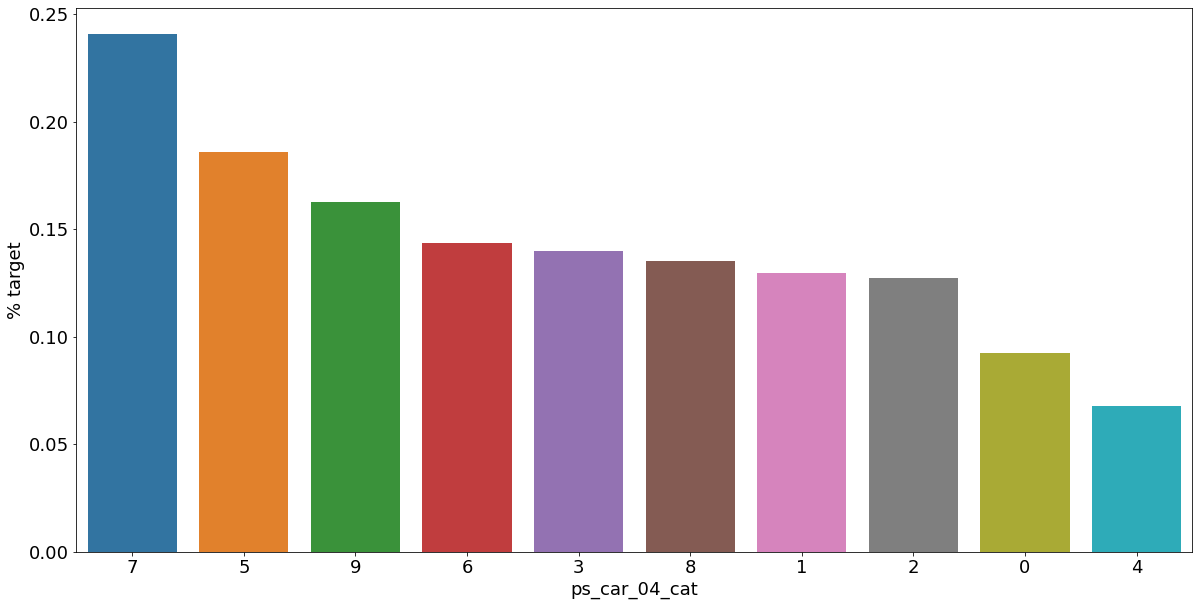

<Figure size 432x288 with 0 Axes>

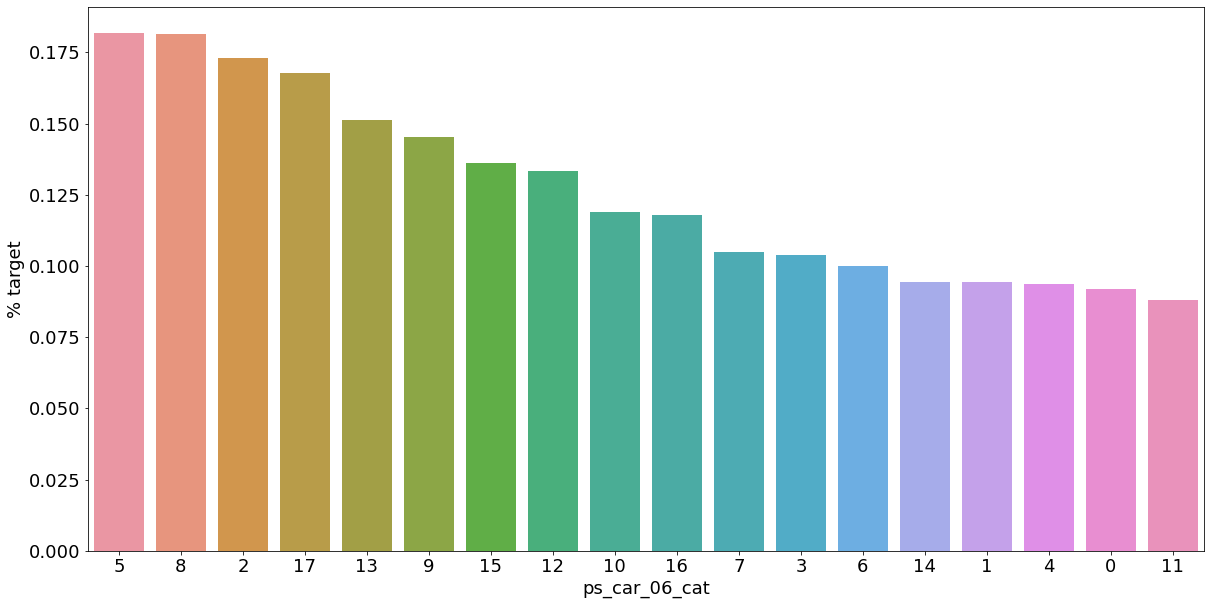

<Figure size 432x288 with 0 Axes>

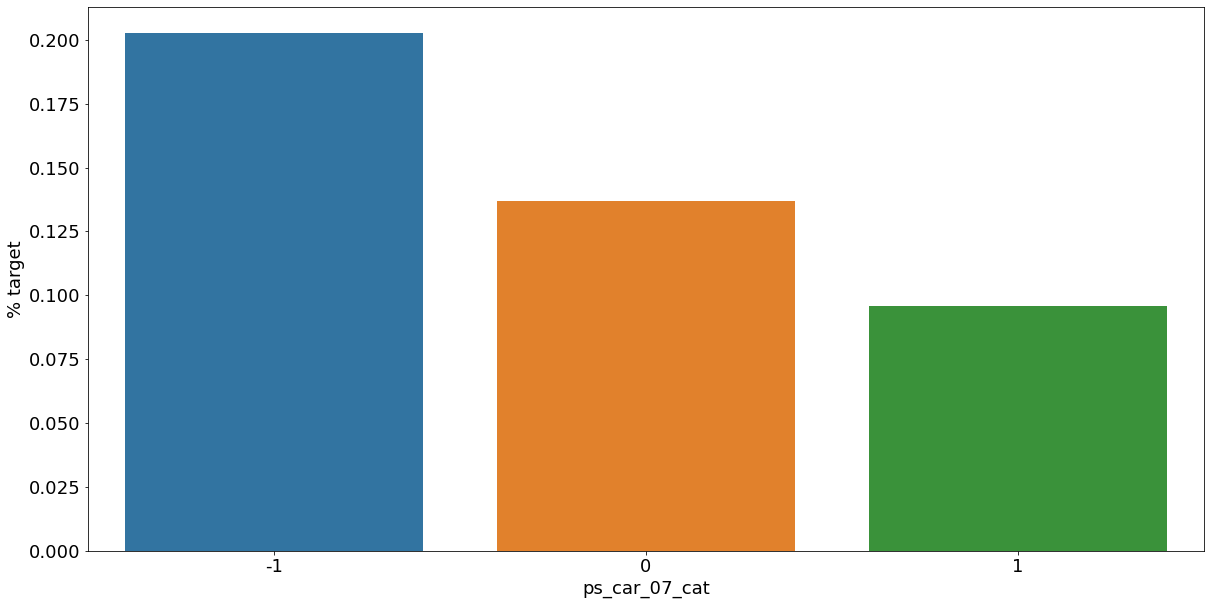

<Figure size 432x288 with 0 Axes>

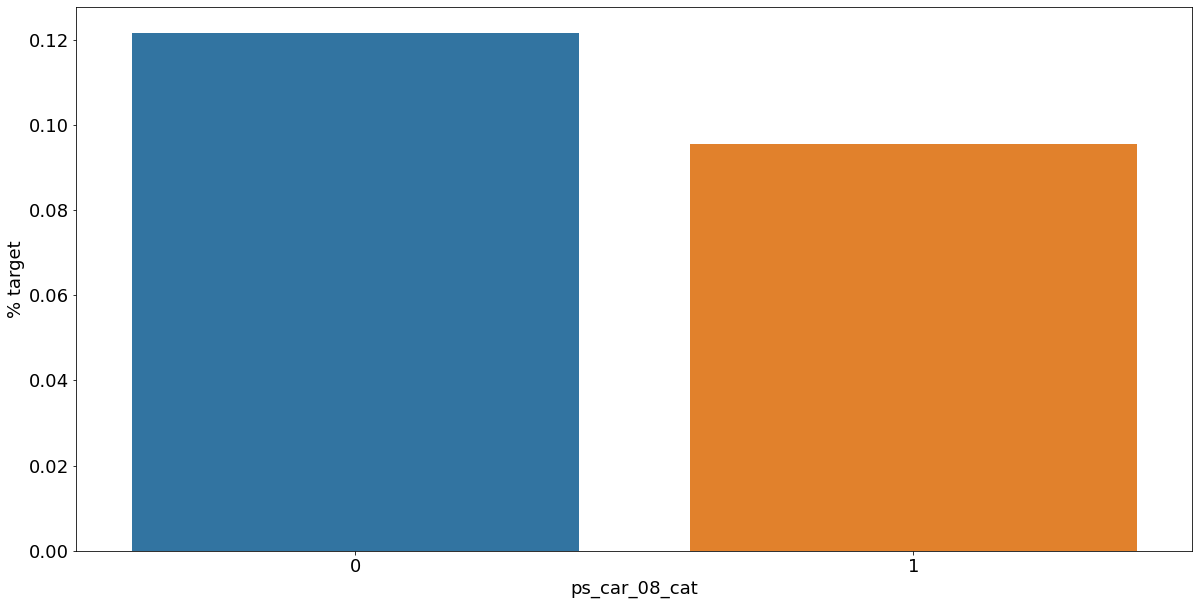

<Figure size 432x288 with 0 Axes>

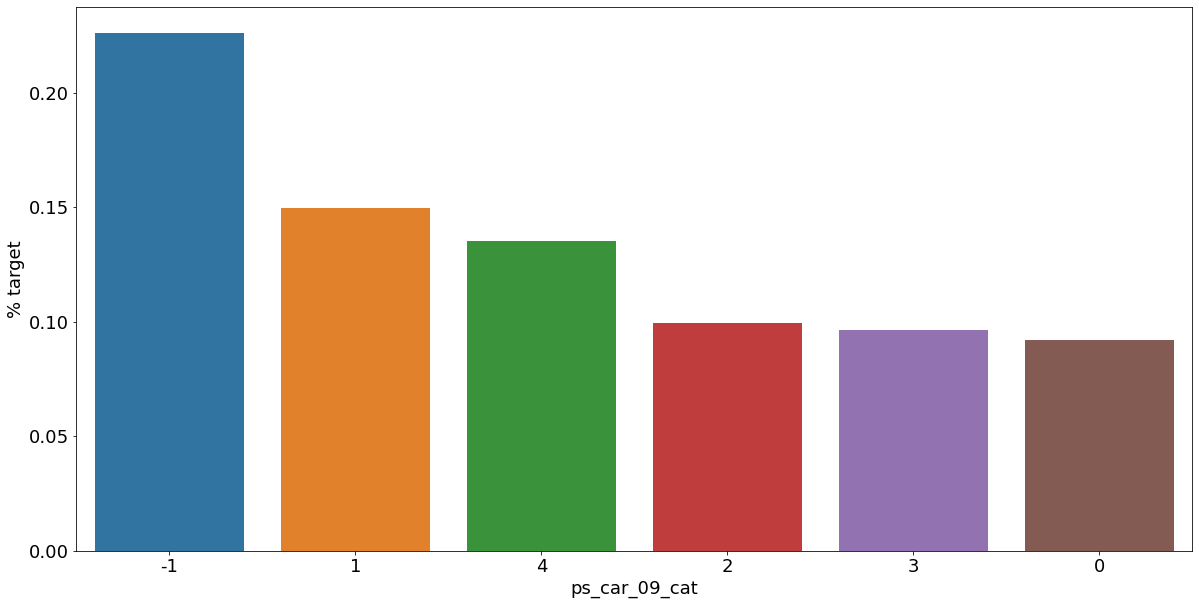

<Figure size 432x288 with 0 Axes>

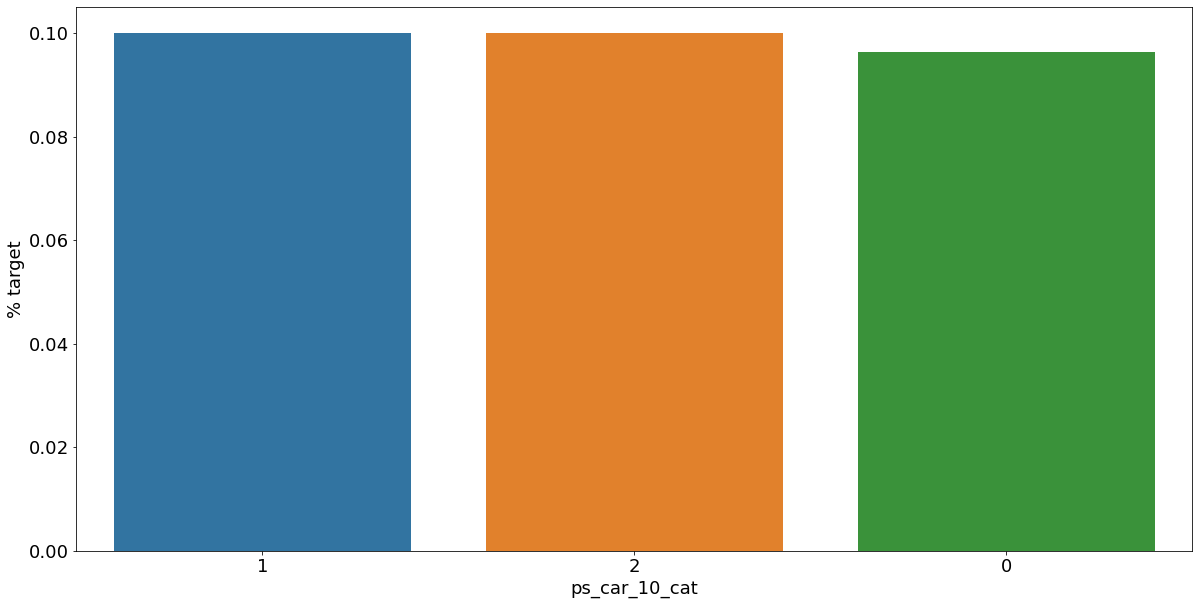

In [24]:
v = meta[(meta.level == "nominal") & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    
    #Calculate the percentage of target=1 per category value
    cat_perc = train[[f, "target"]].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by="target", ascending=False, inplace=True)
    
    # Bar Plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y="target", data=cat_perc, order=cat_perc[f])
    plt.ylabel("% target", fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis="both", which="major", labelsize=18)
    plt.show();

As we can see from the variables **with missing values**, it is a good idea to **keep the missing values as a separate category value**, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher probability to ask for an insurance claim.
=> missing value도 의미가 있다!

##  Interval variables
Checking the correlations b.w. interval variables. A **heatmap** is a good way to visualizae the correlation b.w. variables. 

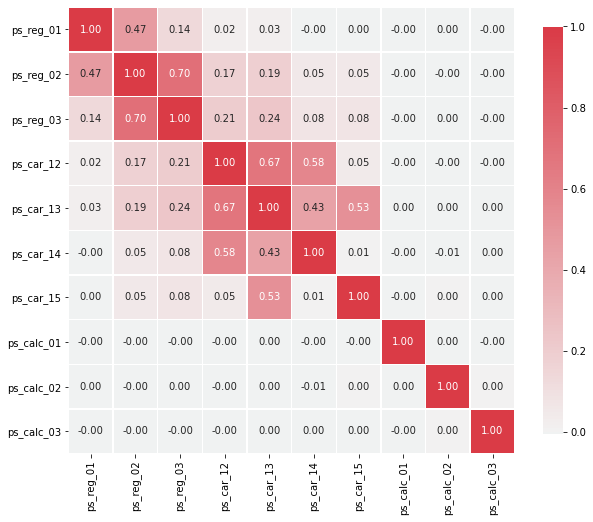

In [25]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # Create color map ranging b.w. two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt=".2f", 
               square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == "interval") & (meta.keep)].index
corr_heatmap(v)

* ps_reg_02 & ps_reg_03 (0.7)
* ps_car_12 & ps_car_13 (0.67)
* ps_car_12 & ps_car_14 (0.58)
* ps_car_13 & ps_car_15 (0.67)

In [26]:
s = train.sample(frac=0.1)

**ps_reg_02 & ps_reg_03**
As teh regression line shows, there is a linear relationship b.w. these variables. Thanks to the hue parameter, we can see that the regression lines for target=0 and target=1 are the same.

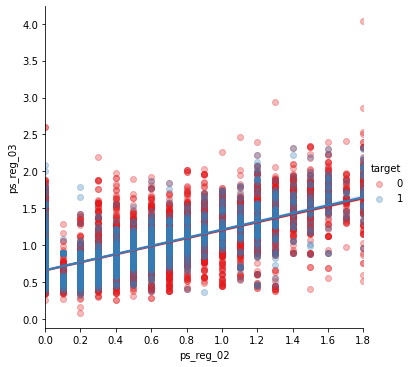

In [27]:
sns.lmplot(x="ps_reg_02", y="ps_reg_03", data=s, hue="target",
          palette="Set1", scatter_kws={"alpha":0.3})
plt.show()

**ps_car_12 & ps_car_13**

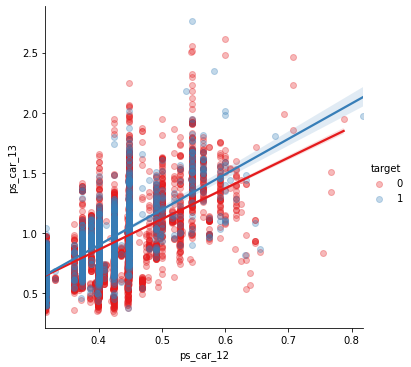

In [28]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target',
           palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

**ps_car_12 & ps_car_14**

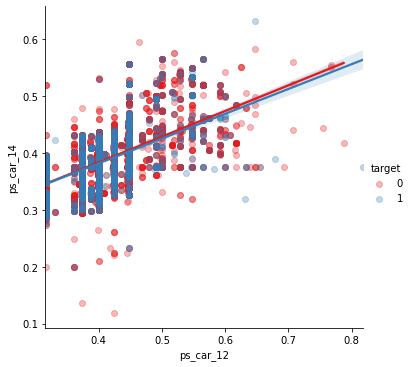

In [29]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

**ps_car_13 & ps_car_15**

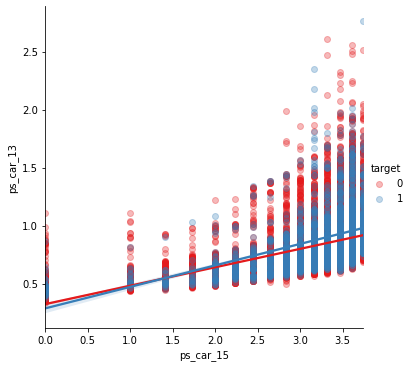

In [30]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

Now, how can we decide which of the correlated variables to keep? We could perform PCA on the variables to reduce the dimensions.(컬럼 수를 줄이겠다)

##  Checking the correlations between ordinal variables

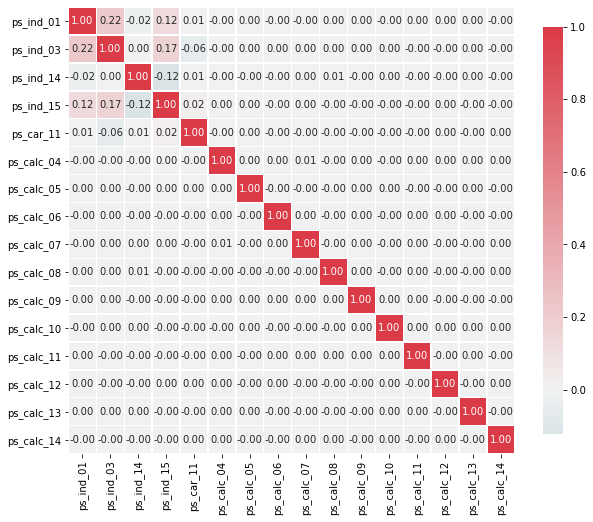

In [31]:
v=meta[(meta.level=="ordinal") & (meta.keep)].index
corr_heatmap(v)

For the ordinal variables, we don't see many correlations. We could on the other hand, look at how distributions are when grouping by the target value.

# Feature Engineering
## Create dummy variables (w.t. category var)

In [32]:
v = meta[(meta.level=="nominal") & (meta.keep)].index
print("Before dummification we have {} variables in train".format(train.shape[1]))

train = pd.get_dummies(train, columns=v, drop_first=True)
print("After dummification we have {} variabels in train".format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variabels in train


## Creating interaction variables

In [33]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  

# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))

train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


# Feature selection
## Removing features with low or zero variance

SKlearn has **VarianceThreshold**. By default it removes features with zero variance. This will not be applicable for this competition, as we saw there are no zero-variance variables in the previous steps. But if we would remove features with less than 1% variance, we would remove 31 variables.

In [34]:
selector = VarianceThreshold(threshold=.01)
# Fit to train without id and target variable
selector.fit(train.drop(["id","target"], axis=1))

# Ftn. to toggle boolean array elements(반대 값으로 출력)
f = np.vectorize(lambda x: not x)

v = train.drop(["id", "target"], axis=1).columns[f(selector.get_support())]
print("{} variables have too low variance".format(len(v)))
print("These variables are {}".format(list(v)))

28 variables have too low variance
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


We would lose rather many variables if we would select based on variance. But because we don't have so many variables, we'll let the classifier chose. For data sets with many more variables this could reduce the processing data.
<br>
Sklearn also comes with other feature selection methods. One of these method is SelectFromModel in which you let another classifier select the best features and continue with these. Below I'll show you how to do that with a RandomForest.

## Selecting features with a RandomForest and SelectFromModel

In [35]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train[:1000], y_train[:1000])


RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [36]:
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_calc_03^2                   0.000000
 2) ps_calc_18_bin                 0.000000
 3) ps_car_01_cat_1                0.000000
 4) ps_car_01_cat_0                0.000000
 5) ps_ind_05_cat_6                0.000000
 6) ps_ind_05_cat_5                0.000000
 7) ps_ind_05_cat_4                0.000000
 8) ps_ind_05_cat_3                0.000000
 9) ps_ind_05_cat_2                0.000000
10) ps_ind_05_cat_1                0.000000
11) ps_ind_05_cat_0                0.000000
12) ps_ind_04_cat_1                0.000000
13) ps_ind_04_cat_0                0.000000
14) ps_ind_02_cat_4                0.000000
15) ps_ind_02_cat_3                0.000000
16) ps_ind_02_cat_2                0.000000
17) ps_ind_02_cat_1                0.000000
18) ps_car_11_cat_te               0.000000
19) ps_calc_20_bin                 0.000000
20) ps_car_01_cat_2                0.000000
21) ps_car_01_cat_3                0.000000
22) ps_car_01_cat_4                0.000000
23) ps_car_04_cat_1             

With SelectFromModel we can specify which prefit classifier to use and what the threshold is for the feature importances. With the get_support method we can then limit the number of variables in the train data.

In [37]:
sfm = SelectFromModel(rf, threshold="median", prefit=True)
print("Number of features before selection : {}".format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print("Number of features after selection : {}".format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection : 162
Number of features after selection : 162


In [38]:
train = train[selected_vars + ["target"]]

## Feature scaling
We can apply standard scaling to the training data. Some classifiers perform better when this is done.

In [39]:
sclaler = StandardScaler()
sclaler.fit_transform(train.drop(["target"], axis=1))

array([[-0.45941104, -1.26665356,  1.25877984, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274,  1.25877984, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479,  1.25877984, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336, -0.7944201 , ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418,  1.25877984, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356, -0.7944201 , ...,  0.28148164,
        -0.11358706, -0.72653353]])